## Data Science Major Project ## 

Online Retail Recommendation System 

Done by: 


Abhinav A



8592996832



arimboothabhinav@gmail.com

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('OnlineRetail.csv')

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# missing values
print(df.isnull().sum())

# Drop rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])

# Convert CustomerID to int
df['CustomerID'] = df['CustomerID'].astype(int)

# Check duplicate values and remove them
df = df.drop_duplicates()

# Display the cleaned dataset
df.head()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26:00,3.39,17850,United Kingdom


Data visualization using Seaborn

C:\Users\arimb\AppData\Local\Temp\ipykernel_16200\517050105.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_items_global.values, y=popular_items_global.index, palette='viridis')


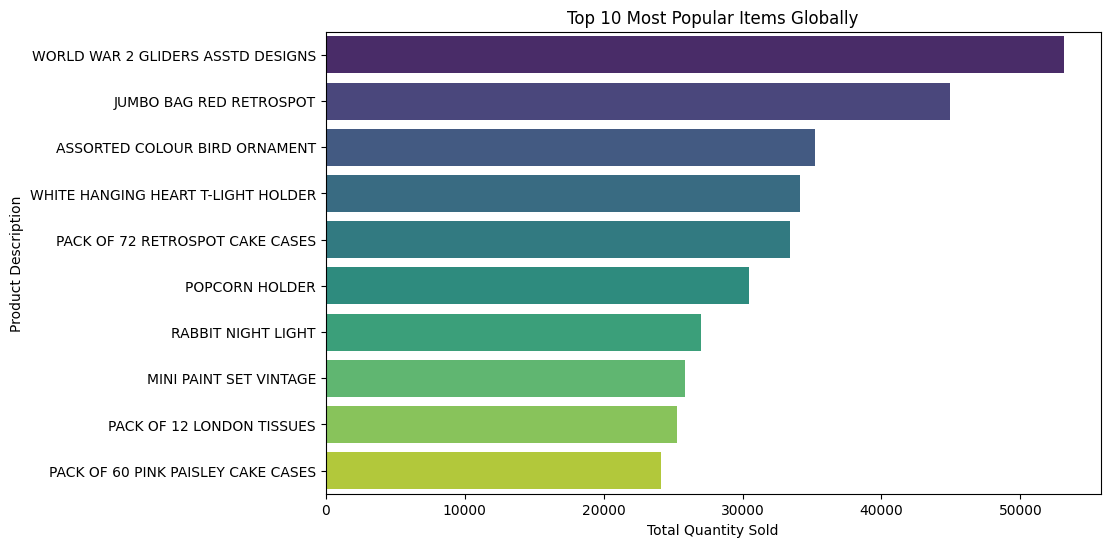

In [ ]:
# Group by product description and sum the quantities
popular_items_global = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=popular_items_global.values, y=popular_items_global.index, palette='viridis')
plt.title('Top 10 Most Popular Items Globally')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.show()

                    Country                          Description  Quantity
287               Australia               MINI PAINT SET VINTAGE      2916
853                 Austria     SET 12 KIDS COLOUR  CHALK STICKS       288
921                 Bahrain           ICE CREAM SUNDAE LIP GLOSS        96
1347                Belgium      PACK OF 72 RETROSPOT CAKE CASES       480
1719                 Brazil                 DOLLY GIRL LUNCH BOX        24
1847                 Canada           RETRO COFFEE MUGS ASSORTED       504
2184        Channel Islands                          RAIN PONCHO       407
2524                 Cyprus        HEART DECORATION PAINTED ZINC       384
2853         Czech Republic   WOODEN STAR CHRISTMAS SCANDINAVIAN        72
3015                Denmark                RED  HARMONICA IN BOX       288
4267                   EIRE      PACK OF 72 RETROSPOT CAKE CASES      1632
5131     European Community       RED ROCKING HORSE HAND PAINTED        24
5236                Finla

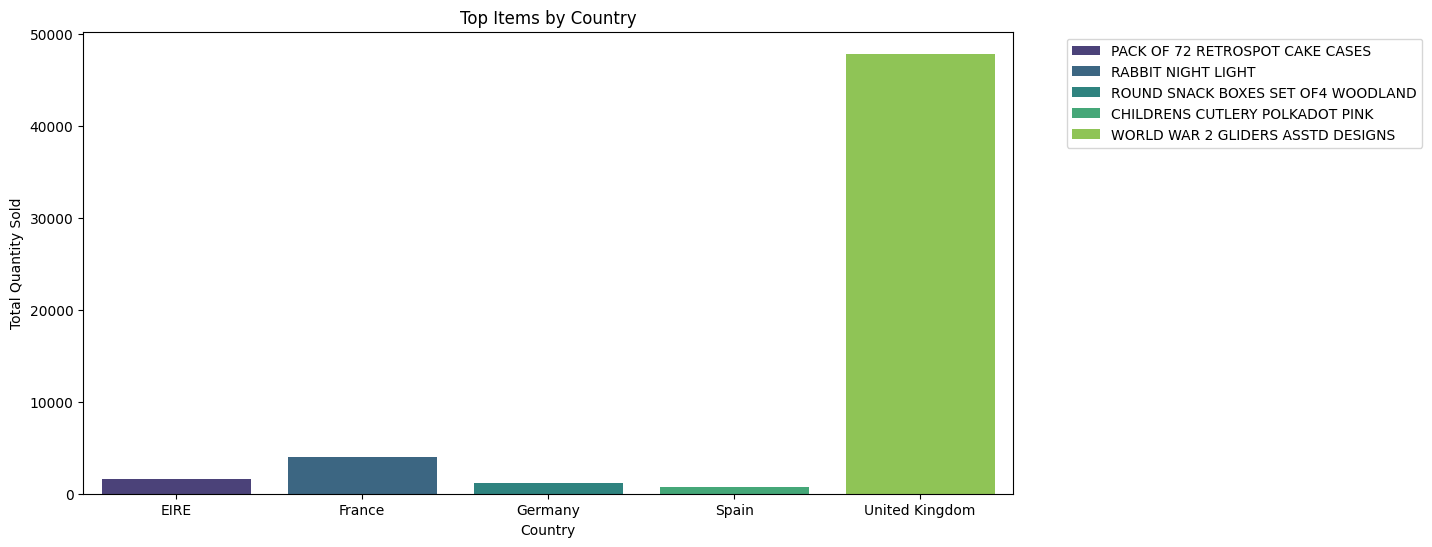

In [ ]:
# Group by country and product description, then sum the quantities
popular_items_country = df.groupby(['Country', 'Description'])['Quantity'].sum().reset_index()

# Find the top item for each country
top_items_country = popular_items_country.loc[popular_items_country.groupby('Country')['Quantity'].idxmax()]

print(top_items_country)

top_countries = df['Country'].value_counts().head(5).index
top_items_country_filtered = top_items_country[top_items_country['Country'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Quantity', hue='Description', data=top_items_country_filtered, palette='viridis')
plt.title('Top Items by Country')
plt.xlabel('Country')
plt.ylabel('Total Quantity Sold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

         Month                         Description  Quantity
2390   2010-12   WORLD WAR 2 GLIDERS ASSTD DESIGNS      5139
4484   2011-01  WHITE HANGING HEART T-LIGHT HOLDER      5450
5192   2011-02               EMPIRE DESIGN ROSETTE      3986
7748   2011-03             JUMBO BAG RED RETROSPOT      4923
11136  2011-04   WORLD WAR 2 GLIDERS ASSTD DESIGNS     10128
13121  2011-05                SMALL POPCORN HOLDER      6729
14510  2011-06             JUMBO BAG RED RETROSPOT      3523
18145  2011-07   WORLD WAR 2 GLIDERS ASSTD DESIGNS      3552
18333  2011-08       ASSORTED COLOUR BIRD ORNAMENT      6416
21758  2011-09             JUMBO BAG RED RETROSPOT      4041
25838  2011-10   WORLD WAR 2 GLIDERS ASSTD DESIGNS      8078
26069  2011-11      ASSTD DESIGN 3D PAPER STICKERS     12551
30042  2011-12                      POPCORN HOLDER      5343


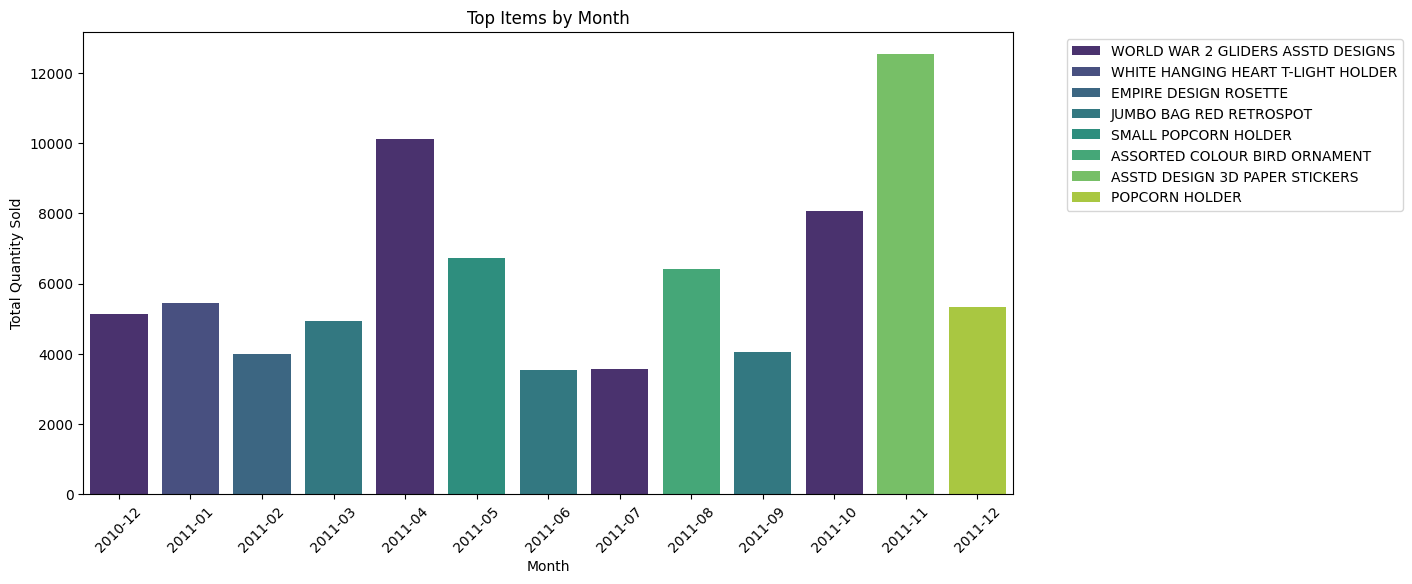

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

df['Month'] = df['InvoiceDate'].dt.to_period('M')

popular_items_month = df.groupby(['Month', 'Description'])['Quantity'].sum().reset_index()

# Find the top item for each month
top_items_month = popular_items_month.loc[popular_items_month.groupby('Month')['Quantity'].idxmax()]
print(top_items_month)

plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Quantity', hue='Description', data=top_items_month, palette='viridis')
plt.title('Top Items by Month')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Data Visualization using Pivot Tables

                                    Quantity
Description                                 
WORLD WAR 2 GLIDERS ASSTD DESIGNS      53119
JUMBO BAG RED RETROSPOT                44963
ASSORTED COLOUR BIRD ORNAMENT          35215
WHITE HANGING HEART T-LIGHT HOLDER     34128
PACK OF 72 RETROSPOT CAKE CASES        33386
POPCORN HOLDER                         30492
RABBIT NIGHT LIGHT                     27045
MINI PAINT SET VINTAGE                 25880
PACK OF 12 LONDON TISSUES              25305
PACK OF 60 PINK PAISLEY CAKE CASES     24129


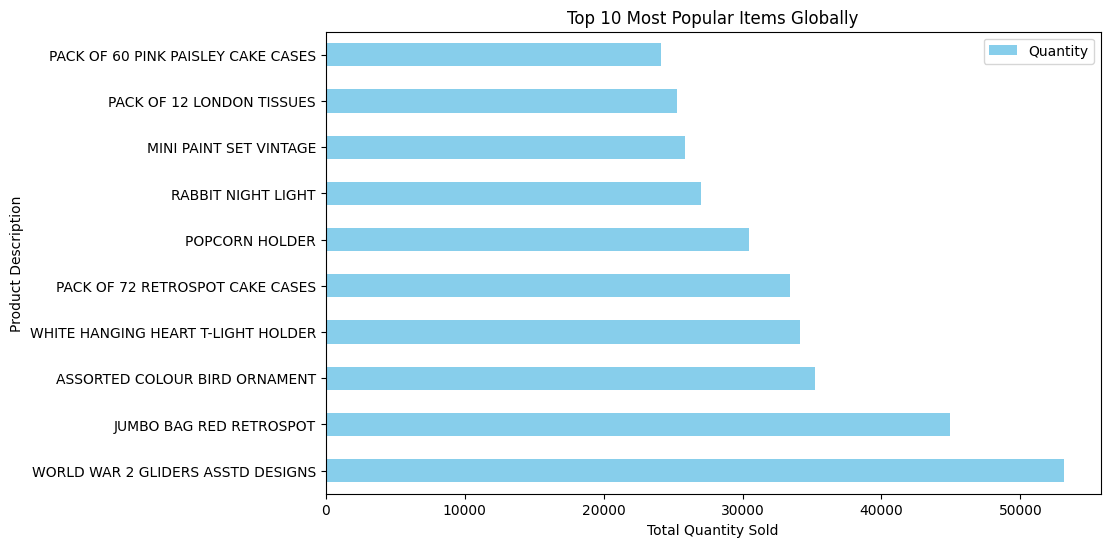

In [ ]:
# Pivot table for global popular items
pivot_global = df.pivot_table(index='Description', values='Quantity', aggfunc='sum').sort_values('Quantity', ascending=False).head(10)

print(pivot_global)

pivot_global.plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Most Popular Items Globally')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.show()

                    Country                          Description  Quantity
287               Australia               MINI PAINT SET VINTAGE      2916
853                 Austria     SET 12 KIDS COLOUR  CHALK STICKS       288
921                 Bahrain           ICE CREAM SUNDAE LIP GLOSS        96
1347                Belgium      PACK OF 72 RETROSPOT CAKE CASES       480
1719                 Brazil                 DOLLY GIRL LUNCH BOX        24
1847                 Canada           RETRO COFFEE MUGS ASSORTED       504
2184        Channel Islands                          RAIN PONCHO       407
2524                 Cyprus        HEART DECORATION PAINTED ZINC       384
2853         Czech Republic   WOODEN STAR CHRISTMAS SCANDINAVIAN        72
3015                Denmark                RED  HARMONICA IN BOX       288
4267                   EIRE      PACK OF 72 RETROSPOT CAKE CASES      1632
5131     European Community       RED ROCKING HORSE HAND PAINTED        24
5236                Finla

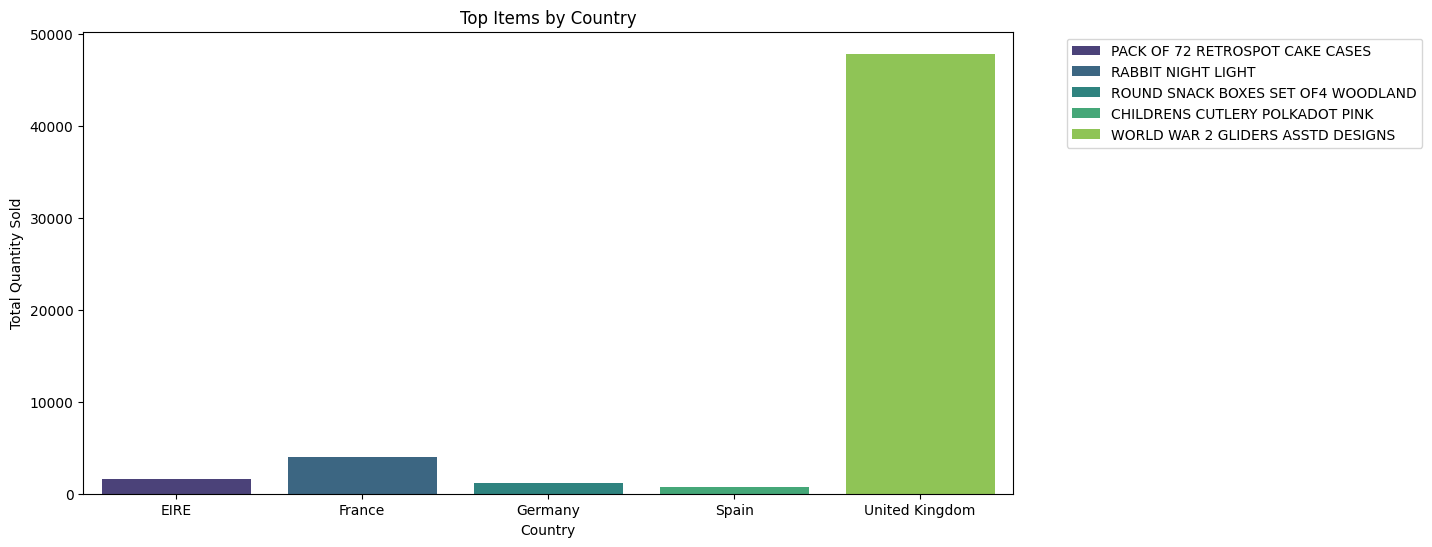

In [ ]:
# Pivot table for country-wise popular items
pivot_country = df.pivot_table(index=['Country', 'Description'], values='Quantity', aggfunc='sum').reset_index()

# Find the top item for each country
pivot_country_top = pivot_country.loc[pivot_country.groupby('Country')['Quantity'].idxmax()]

print(pivot_country_top)
top_countries = df['Country'].value_counts().head(5).index
pivot_country_top_filtered = pivot_country_top[pivot_country_top['Country'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Quantity', hue='Description', data=pivot_country_top_filtered, palette='viridis')
plt.title('Top Items by Country')
plt.xlabel('Country')
plt.ylabel('Total Quantity Sold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

         Month                         Description  Quantity
2390   2010-12   WORLD WAR 2 GLIDERS ASSTD DESIGNS      5139
4484   2011-01  WHITE HANGING HEART T-LIGHT HOLDER      5450
5192   2011-02               EMPIRE DESIGN ROSETTE      3986
7748   2011-03             JUMBO BAG RED RETROSPOT      4923
11136  2011-04   WORLD WAR 2 GLIDERS ASSTD DESIGNS     10128
13121  2011-05                SMALL POPCORN HOLDER      6729
14510  2011-06             JUMBO BAG RED RETROSPOT      3523
18145  2011-07   WORLD WAR 2 GLIDERS ASSTD DESIGNS      3552
18333  2011-08       ASSORTED COLOUR BIRD ORNAMENT      6416
21758  2011-09             JUMBO BAG RED RETROSPOT      4041
25838  2011-10   WORLD WAR 2 GLIDERS ASSTD DESIGNS      8078
26069  2011-11      ASSTD DESIGN 3D PAPER STICKERS     12551
30042  2011-12                      POPCORN HOLDER      5343


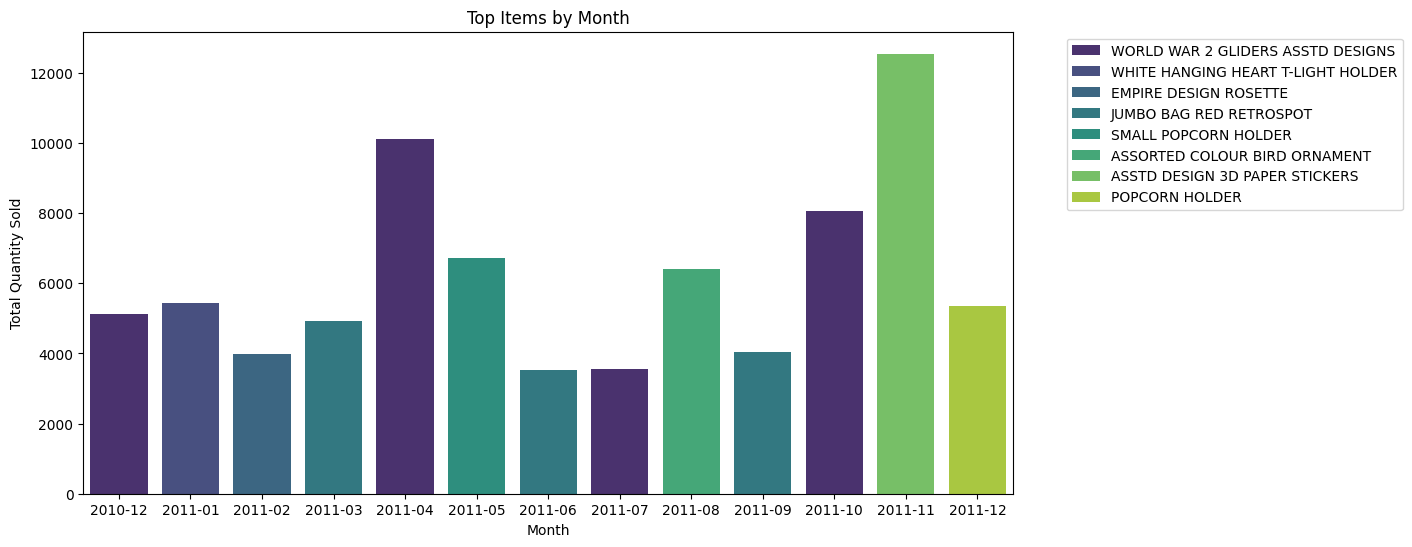

In [ ]:
# Pivot table for month-wise popular items
pivot_month = df.pivot_table(index=['Month', 'Description'], values='Quantity', aggfunc='sum').reset_index()

# Find the top item for each month
pivot_month_top = pivot_month.loc[pivot_month.groupby('Month')['Quantity'].idxmax()]

print(pivot_month_top)

plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Quantity', hue='Description', data=pivot_month_top, palette='viridis')
plt.title('Top Items by Month')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# Create a user-item matrix
user_item_matrix = df.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', fill_value=0)
user_item_matrix.head()

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
12347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
12348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.25
12349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00
12350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00


In [6]:
user_item_matrix.tail()

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
18280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
18287,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Compute cosine similarity between users
user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)
user_similarity_df.head()

CustomerID,12346,12347,12348,12349,12350,12352,12353,12354,12355,12356,...,18273,18274,18276,18277,18278,18280,18281,18282,18283,18287
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
12347,0.0,1.000000,0.168295,0.014255,0.020347,0.012977,0.0,0.007334,0.710717,0.074592,...,0.0,0.0,0.419633,-0.000439,0.004266,0.011435,0.0,0.013616,0.037350,0.109131
12348,0.0,0.168295,1.000000,0.000054,0.000100,0.000120,0.0,0.013503,0.248133,0.159318,...,0.0,0.0,0.139462,0.000000,0.000000,0.000000,0.0,0.000000,0.211032,0.071888
12349,0.0,0.014255,0.000054,1.000000,0.030121,0.143396,0.0,0.004931,0.000180,0.175003,...,0.0,0.0,0.000000,-0.000344,0.015680,0.000000,0.0,0.023697,0.102726,0.032087
12350,0.0,0.020347,0.000100,0.030121,1.000000,0.000464,0.0,0.000000,0.000000,0.001373,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.028372,0.000000


In [ ]:
# Function for getting top n recommendations
def get_recommendations(user_id, n=5):
    user_similarity_scores = user_similarity_df.loc[user_id]
    similar_users = user_similarity_scores.sort_values(ascending=False).index[1:]
    
    target_user_items = user_item_matrix.loc[user_id]
    recommendations = user_item_matrix.loc[similar_users].sum() - target_user_items

    recommendations = recommendations[recommendations > 0]
    
    top_n_recommendations = recommendations.sort_values(ascending=False).head(n)
    top_n_recommendations_with_names = df[['StockCode', 'Description']].drop_duplicates().set_index('StockCode').loc[top_n_recommendations.index]
    top_n_recommendations_with_names['PredictedRating'] = top_n_recommendations.values
    
    return top_n_recommendations_with_names

# Example with a random id
user_id = 12347
recommendations = get_recommendations(user_id, n=5)
print("Top 5 recommendations for CustomerID", user_id)
print(recommendations)

Top 5 recommendations for CustomerID 12347
                                 Description  PredictedRating
StockCode                                                    
84077      WORLD WAR 2 GLIDERS ASSTD DESIGNS     25267.187446
21212        PACK OF 72 RETROSPOT CAKE CASES     16045.178968
84879          ASSORTED COLOUR BIRD ORNAMENT     14110.989307
84826         ASSTD DESIGN 3D PAPER STICKERS     13543.333333
15036              ASSORTED COLOURS SILK FAN     13202.200000


In [ ]:
# Apply SVD to reduce the dimensionality of the user-item matrix
svd = TruncatedSVD(n_components=10)
user_item_matrix_reduced = svd.fit_transform(user_item_matrix)
user_item_matrix_reduced = normalize(user_item_matrix_reduced)

user_similarity_svd = cosine_similarity(user_item_matrix_reduced)

user_similarity_svd_df = pd.DataFrame(user_similarity_svd, index=user_item_matrix.index, columns=user_item_matrix.index)
user_similarity_svd_df.head()

CustomerID,12346,12347,12348,12349,12350,12352,12353,12354,12355,12356,...,18273,18274,18276,18277,18278,18280,18281,18282,18283,18287
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12347,0.0,1.000000,0.746562,0.967411,0.510650,0.733442,0.857878,0.975930,0.699891,0.971980,...,0.651048,0.0,0.933319,0.880395,0.856070,0.864222,0.991175,0.785973,0.919005,0.868188
12348,0.0,0.746562,1.000000,0.769669,0.637735,0.671003,0.317805,0.712209,0.103312,0.793023,...,0.291824,0.0,0.853029,0.492885,0.395050,0.905183,0.734079,0.684702,0.813649,0.548809
12349,0.0,0.967411,0.769669,1.000000,0.538656,0.878751,0.829597,0.982085,0.649963,0.952810,...,0.673856,0.0,0.928867,0.852434,0.884154,0.939977,0.985727,0.816763,0.949795,0.827836
12350,0.0,0.510650,0.637735,0.538656,1.000000,0.557703,0.228616,0.476315,0.319165,0.524876,...,0.204078,0.0,0.634378,0.357325,0.263133,0.635719,0.479585,0.447004,0.562079,0.386464


In [ ]:
def get_recommendations_svd(user_id, n=5):
    user_similarity_scores = user_similarity_svd_df.loc[user_id]
    
    similar_users = user_similarity_scores.sort_values(ascending=False).index[1:]  
    target_user_items = user_item_matrix.loc[user_id]
    recommendations = user_item_matrix.loc[similar_users].sum() - target_user_items
    recommendations = recommendations[recommendations > 0]
    top_n_recommendations = recommendations.sort_values(ascending=False).head(n)

    top_n_recommendations_with_names = df[['StockCode', 'Description']].drop_duplicates().set_index('StockCode').loc[top_n_recommendations.index]
    top_n_recommendations_with_names['PredictedRating'] = top_n_recommendations.values
    
    return top_n_recommendations_with_names

# Example for a random id
user_id = 12347
recommendations_svd = get_recommendations_svd(user_id, n=5)
print("Top 5 recommendations for CustomerID", user_id, "using SVD:")
print(recommendations_svd)

Top 5 recommendations for CustomerID 12347 using SVD:
                                 Description  PredictedRating
StockCode                                                    
84077      WORLD WAR 2 GLIDERS ASSTD DESIGNS     25267.187446
21212        PACK OF 72 RETROSPOT CAKE CASES     16045.178968
84879          ASSORTED COLOUR BIRD ORNAMENT     14110.989307
84826         ASSTD DESIGN 3D PAPER STICKERS     13543.333333
15036              ASSORTED COLOURS SILK FAN     13202.200000
